## Madina Hayva Putri - 5220411187
## Pemrosesan Teks Kelas B

## Tema: Perbandingan Aplikasi Edit Video di PlayStore

### Scraping Data dari 4 aplikasi

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

### 1. Capcut

In [ ]:
result, continuation_token = reviews(
    'com.lemon.lvoverseas',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1500,
    filter_score_with=None
)
data1 = pd.DataFrame(np.array(result), columns=['review'])
data1 = data1.join(pd.DataFrame(data1.pop('review').tolist()))
data1.head()

reviewId              userName  \
0  96a8bfda-cc4a-46ec-a108-533f490abaa3         Nikely Laudya   
1  e3042351-d17d-46d2-af37-699168ff6c7a                 Intan   
2  58483185-1080-4596-832c-58193911574b  Syaqila Mustabfirroh   
3  95501e41-9dd7-4167-ad47-e2b35e9dceb7             Owner Pio   
4  70d444dc-4d69-47e2-bcfa-74c15aa5033b          Angel Bidari   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Bagus bet aplikasinya, apalagi buat ngedit fot...      5           3389   
1  Ini bagus aplikasi nya ..tapi kenapa ya update...      4            193   
2  Ada apa sih sama capcut ini padahal penyimpana...      1           1490   
3  aplikasi nya udah bagus cuman tolong hilang ka...      4             98   
4  banyak iklannya, kadang klo kebanyaan make jad...      4            174   

  reviewCreatedVersion                  at replyContent repliedAt appVersion  
0               16.0.0 2025-12-16 06:46:13         None       NaT     16.0.0  
1               16.0.0 2025-12-19 17:22:31         None       NaT     16.0.0  
2               15.8.0 2025-12-21 10:27:14         None       NaT     15.8.0  
3               16.0.0 2025-12-19 09:03:10         None       NaT     16.0.0  
4               15.8.0 2025-12-14 20:23:04         None       NaT     15.8.0

In [ ]:
data1_baru = data1[['userName', 'content', 'score']]
data1 = data1_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data1.head()

Nama Akun                                             ulasan  \
0         Nikely Laudya  Bagus bet aplikasinya, apalagi buat ngedit fot...   
1                 Intan  Ini bagus aplikasi nya ..tapi kenapa ya update...   
2  Syaqila Mustabfirroh  Ada apa sih sama capcut ini padahal penyimpana...   
3             Owner Pio  aplikasi nya udah bagus cuman tolong hilang ka...   
4          Angel Bidari  banyak iklannya, kadang klo kebanyaan make jad...   

   rating  
0       5  
1       4  
2       1  
3       4  
4       4

In [ ]:
data1['rating'].value_counts()

### preprocessing data

In [ ]:
!pip install emoji
!pip install nltk
!pip install Sastrawi

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df1 = pd.DataFrame(data1)

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
stop_words = set(stopwords.words('indonesian'))

# stopwords tambahan
custom_stopwords = [
    # sapaan & basa-basi
    'halo', 'hai', 'hi', 'hello', 'gan', 'bro', 'sis', 'min', 'admin',

    # kata umum tidak bermakna sentimen
    'tolong', 'mohon', 'terima', 'kasih', 'thanks', 'makasih',
    'dong', 'nih', 'sih', 'deh', 'aja', 'kok', 'lah', 'yah', 'ya',
    'terimakasih',

    # konteks aplikasi
    'aplikasi', 'app', 'apk', 'capcut', 'inshot', 'vn', 'kinemaster',
    'kine', 'master', 'edit', 'video'

    # kata umum berfrekuensi tinggi
    'yang', 'dan', 'atau', 'untuk', 'dengan', 'pada', 'dari',
    'ini', 'itu'
]

stop_words.update(custom_stopwords)

In [ ]:
slang_dict = {
    'gk': 'tidak',
    'ga': 'tidak',
    'nggak': 'tidak',
    'tdk': 'tidak',
    'bgt': 'banget',
    'dr': 'dari',
    'krn': 'karena',
    'tp': 'tapi',
    'aja': 'saja',
    'eror': 'error',
    'erorr': 'error',
    'erorrs': 'error',
    'nontonya': 'nonton',
    'nntn' : 'nonton',
    'loginya': 'login',
    'ngedit' : 'edit'
}

In [ ]:
def text_preprocessing(text, stop_words, slang_dict, stemmer):
    # 1. Casefolding
    text = text.lower()

    # 2. Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # 3. Hapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # 4. Hapus angka, tanda baca, simbol, dan karakter non-huruf
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 5. Tokenisasi
    tokens = word_tokenize(text)

    # 6. Normalisasi huruf berulang (asikkk → asik)
    tokens = [re.sub(r'(.)\1{2,}', r'\1', word) for word in tokens]

    # 7. Normalisasi kata gaul / typo
    tokens = [slang_dict.get(word, word) for word in tokens]

    # 8. Hapus stopword
    tokens = [word for word in tokens if word not in stop_words]

    # 9. Hapus kata dengan panjang ≤ 3 huruf
    tokens = [word for word in tokens if len(word) > 3]

    # 10. Stemming (Bahasa Indonesia)
    tokens = [stemmer.stem(word) for word in tokens]

    # 11. Kembalikan ke bentuk string
    return ' '.join(tokens)

In [ ]:
df1["Clean_Comment"] = df1["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df1.head()

Nama Akun                                             ulasan  \
0         Nikely Laudya  Bagus bet aplikasinya, apalagi buat ngedit fot...   
1                 Intan  Ini bagus aplikasi nya ..tapi kenapa ya update...   
2  Syaqila Mustabfirroh  Ada apa sih sama capcut ini padahal penyimpana...   
3             Owner Pio  aplikasi nya udah bagus cuman tolong hilang ka...   
4          Angel Bidari  banyak iklannya, kadang klo kebanyaan make jad...   

   rating                                      Clean_Comment  
0       5  bagus aplikasi fotovidio hehee ngeekspor kdng ...  
1       4  bagus update baru iklan iklan iklan detik bang...  
2       1  simpan masihbanyak donwload inimemang mudah me...  
3       4  udah bagus cuman hilang iklan ganggu banget bi...  
4       4  iklan kadang kebanyaan make item gambar standa...

In [ ]:
#cek data kosong
df1.isnull().sum()

Nama Akun        0
ulasan           0
rating           0
Clean_Comment    0
dtype: int64

In [ ]:
#cek data yang sama
df1.duplicated().any()

np.False_

### pelabelan data

In [ ]:
def sentiment_from_rating(r):
    if r >= 4:
        return 'Positive'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Negative'

df1['sentiment_rating'] = df1['rating'].apply(sentiment_from_rating)

In [ ]:
positive_words = [
    'bagus','mantap','keren','puas','suka','cepat','mudah',
    'oke','recommended','terbaik','bermanfaat'
]

negative_words = [
    'jelek','buruk','lemot','error','crash','parah','kecewa',
    'lambat','gagal','sampah','ribet','tolol','bangsat'
]

In [ ]:
def sentiment_lexicon(text):
    pos, neg = 0, 0
    for word in text.split():
        if word in positive_words:
            pos += 1
        elif word in negative_words:
            neg += 1

    if pos > neg:
        return 'Positive'
    elif neg > pos:
        return 'Negative'
    else:
        return 'Neutral'
df1['sentiment_lexicon'] = df1['Clean_Comment'].apply(sentiment_lexicon)

In [ ]:
rating_counts = df1['sentiment_rating'].value_counts()
lexicon_counts = df1['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

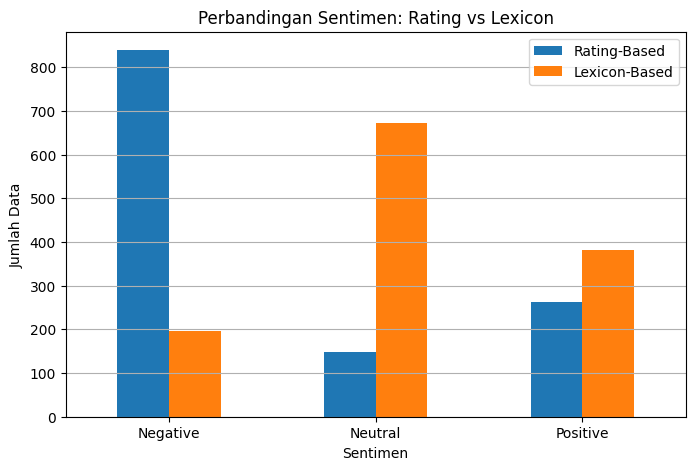

In [ ]:
comparison_df.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title('Perbandingan Sentimen: Rating vs Lexicon')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
df1.head()

Nama Akun                                             ulasan  \
0         Nikely Laudya  Bagus bet aplikasinya, apalagi buat ngedit fot...   
1                 Intan  Ini bagus aplikasi nya ..tapi kenapa ya update...   
2  Syaqila Mustabfirroh  Ada apa sih sama capcut ini padahal penyimpana...   
3             Owner Pio  aplikasi nya udah bagus cuman tolong hilang ka...   
4          Angel Bidari  banyak iklannya, kadang klo kebanyaan make jad...   

   rating                                      Clean_Comment sentiment_rating  \
0       5  bagus aplikasi fotovidio hehee ngeekspor kdng ...         Positive   
1       4  bagus update baru iklan iklan iklan detik bang...         Positive   
2       1  simpan masihbanyak donwload inimemang mudah me...         Negative   
3       4  udah bagus cuman hilang iklan ganggu banget bi...         Positive   
4       4  iklan kadang kebanyaan make item gambar standa...         Positive   

  sentiment_lexicon  
0          Positive  
1          Positive  
2          Positive  
3          Positive  
4          Positive

In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_capcut.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter

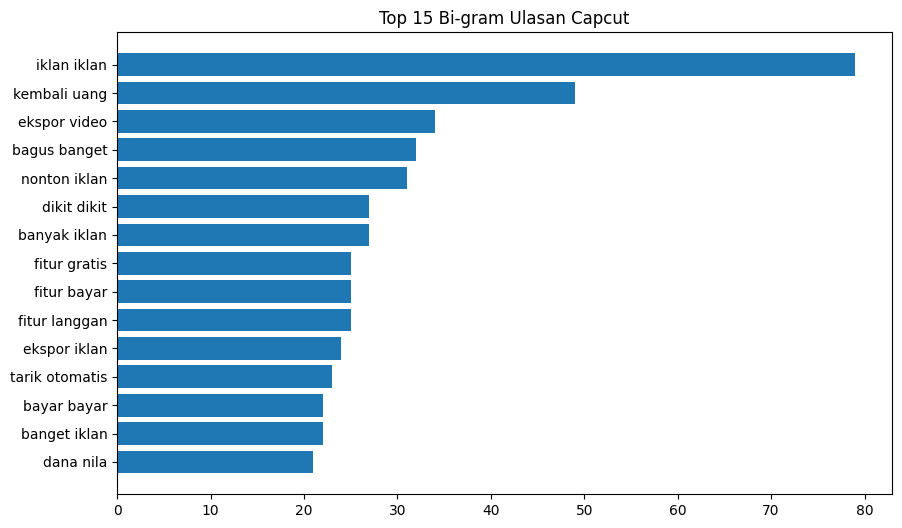

In [ ]:
# Bi-gram
tokens_all = []
for text in df1['Clean_Comment']:
    tokens_all.extend(text.split())
bi_grams = list(bigrams(tokens_all))
bi_count = Counter(bi_grams).most_common(15)

# Tampilkan bar chart bigram
plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2}" for (w1,w2),_ in bi_count], [c for _,c in bi_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Bi-gram Ulasan Capcut")
plt.show()

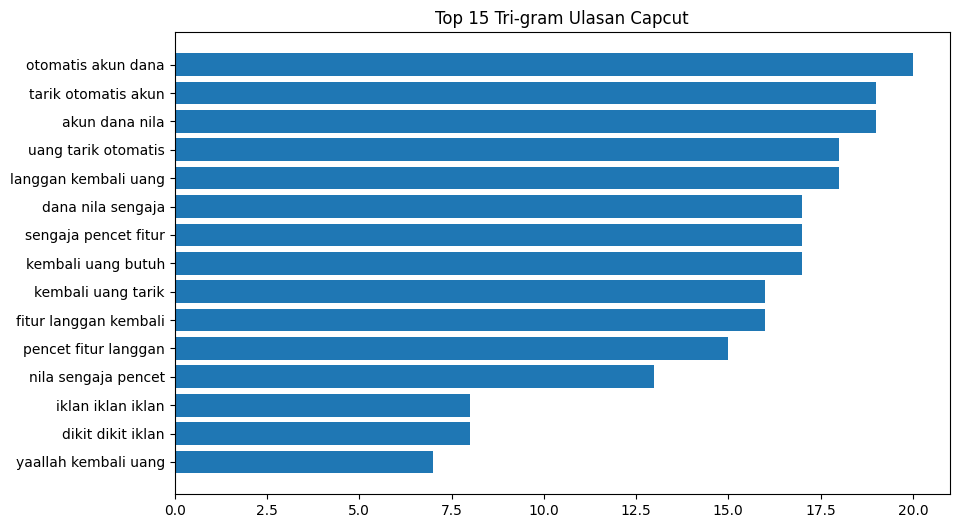

In [ ]:
# Tri-gram
tri_grams = list(trigrams(tokens_all))
tri_count = Counter(tri_grams).most_common(15)

plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2} {w3}" for (w1,w2,w3),_ in tri_count], [c for _,c in tri_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Tri-gram Ulasan Capcut")
plt.show()

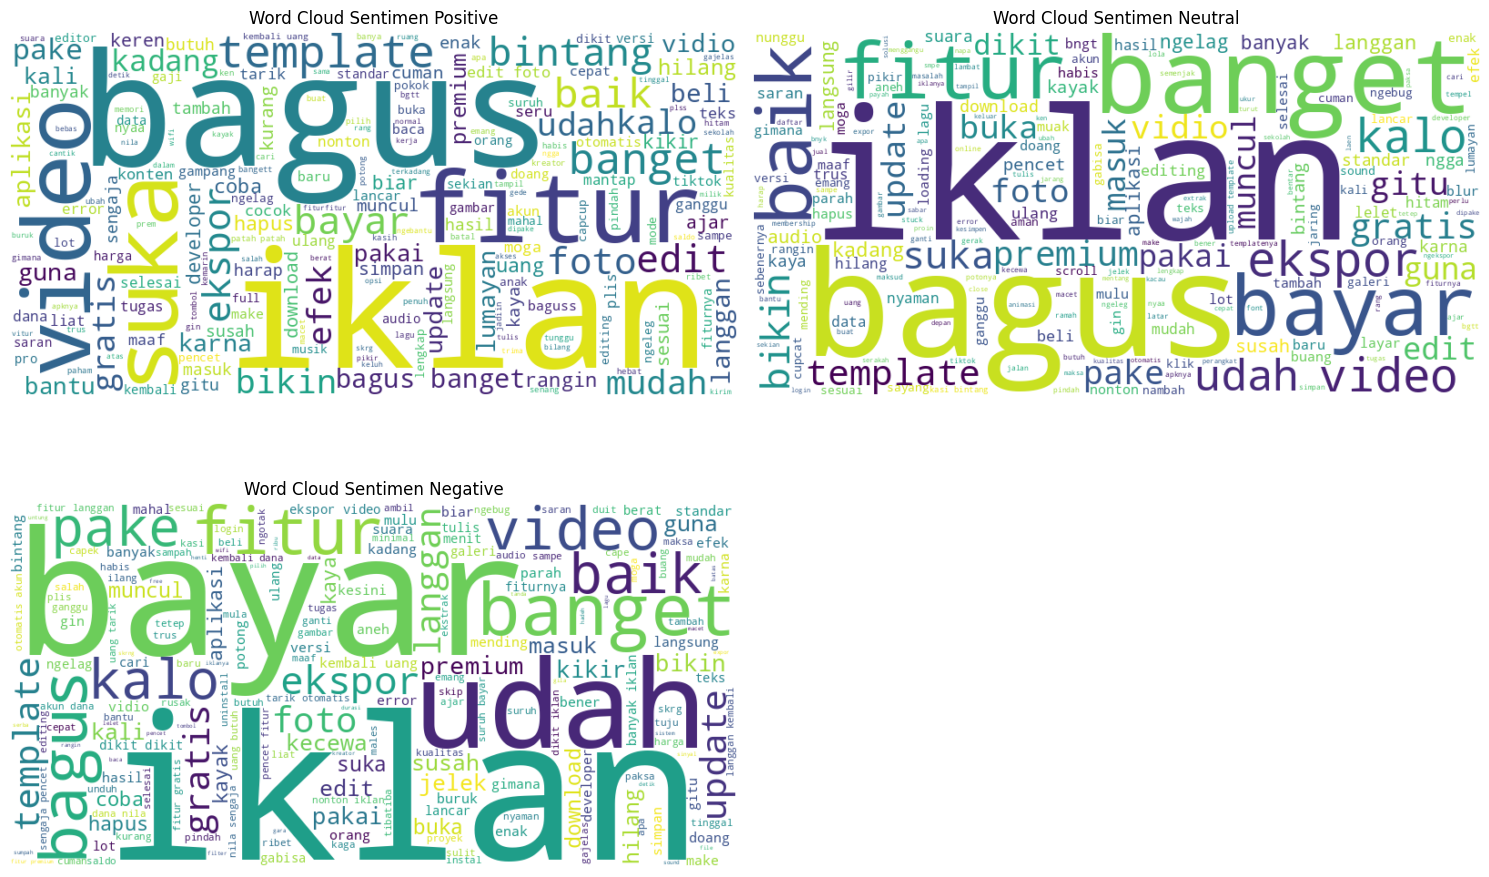

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    # Gabungkan token berdasarkan sentimen
    text = ' '.join(df1[df1['sentiment_rating'] == sent]['Clean_Comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud Sentimen {sent}")

    # Simpan file
    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## 2. KINEMASTER

In [ ]:
result, continuation_token = reviews(
    'com.nexstreaming.app.kinemasterfree',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1250,
    filter_score_with=None
)
data2 = pd.DataFrame(np.array(result), columns=['review'])
data2 = data2.join(pd.DataFrame(data2.pop('review').tolist()))
data2.head()

reviewId        userName  \
0  ad1b6c8c-af1d-4642-bb40-00289f2daa29  Richard Wijaya   
1  96072bdd-7681-4e40-ab57-0cc2b8c8dd59         imza 34   
2  630634e4-c5ad-4336-9403-7931add4d1ea    Neng Hasanah   
3  59abf89b-01ed-4744-b427-b05c55fe2a7e   Fadil Mubaroq   
4  352c27f2-b351-4853-b462-4305e3b474de     El'Seven7 †   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  sumpah saya benar-benar kecewa sama versi baru...      1              3   
1  dari lama udah pake nih app buat ngedit video,...      5             25   
2  aplikasi bagusss! aku suka tapi ada glitch yan...      5             17   
3  setelah Update terbaru Tampilannya makin futur...      3              0   
4  Terima Kasih Kine Master. Setelah update aplik...      5            157   

  reviewCreatedVersion                  at  \
0       8.0.7.35886.GP 2025-12-12 19:28:28   
1       8.0.6.35848.GP 2025-12-11 10:25:39   
2       8.0.6.35848.GP 2025-12-13 06:07:55   
3       8.0.7.35886.GP 2025-12-15 10:06:26   
4       8.0.6.35848.GP 2025-12-04 01:55:39   

                                        replyContent           repliedAt  \
0  Halo, untuk mengakses musik Anda pribadi, untu... 2025-12-13 03:32:14   
1  Halo, terima kasih atas ulasan Anda tentang Ki... 2025-12-12 02:41:21   
2  Halo, silakan kirim rekaman layar yang menunju... 2025-12-15 02:27:07   
3  Halo, monetisasi musik KineMaster di YouTube t... 2025-12-16 04:10:31   
4  Hello, terima kasih atas ulasan bagus Anda unt... 2024-12-30 01:00:22   

       appVersion  
0  8.0.7.35886.GP  
1  8.0.6.35848.GP  
2  8.0.6.35848.GP  
3  8.0.7.35886.GP  
4  8.0.6.35848.GP

In [ ]:
data2_baru = data2[['userName', 'content', 'score']]
data2 = data2_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data2.head()

Nama Akun                                             ulasan  rating
0  Richard Wijaya  sumpah saya benar-benar kecewa sama versi baru...       1
1         imza 34  dari lama udah pake nih app buat ngedit video,...       5
2    Neng Hasanah  aplikasi bagusss! aku suka tapi ada glitch yan...       5
3   Fadil Mubaroq  setelah Update terbaru Tampilannya makin futur...       3
4     El'Seven7 †  Terima Kasih Kine Master. Setelah update aplik...       5

### preprocessing data

In [ ]:
df2 = pd.DataFrame(data2)

In [ ]:
df2["clean_comment"] = df2["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df2.head()

Nama Akun                                             ulasan  rating  \
0  Richard Wijaya  sumpah saya benar-benar kecewa sama versi baru...       1   
1         imza 34  dari lama udah pake nih app buat ngedit video,...       5   
2    Neng Hasanah  aplikasi bagusss! aku suka tapi ada glitch yan...       5   
3   Fadil Mubaroq  setelah Update terbaru Tampilannya makin futur...       3   
4     El'Seven7 †  Terima Kasih Kine Master. Setelah update aplik...       5   

                                       clean_comment  
0  sumpah benarbenar kecewa versi bagus logo musi...  
1  udah pake video emang best selesai update tamp...  
2  bagus suka glitch bikin kesal nyesek bikin pro...  
3  update baru tampil futuristik keren jengkel fi...  
4  update baru update tunggutunggu kombinasi spri...

In [ ]:
#cek data kosong
df2.isnull().sum()

Nama Akun        0
ulasan           0
rating           0
clean_comment    0
dtype: int64

In [ ]:
#cek data yang sama
df2.duplicated().any()

np.False_

In [ ]:
df2['sentiment_rating'] = df2['rating'].apply(sentiment_from_rating)

In [ ]:
df2['sentiment_lexicon'] = df2['clean_comment'].apply(sentiment_lexicon)

In [ ]:
rating_counts = df2['sentiment_rating'].value_counts()
lexicon_counts = df2['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

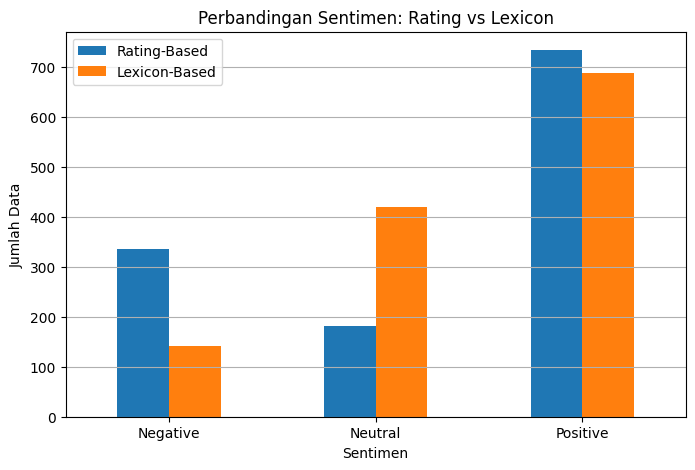

In [ ]:
comparison_df.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title('Perbandingan Sentimen: Rating vs Lexicon')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
df2.head()

Nama Akun                                             ulasan  rating  \
0  Richard Wijaya  sumpah saya benar-benar kecewa sama versi baru...       1   
1         imza 34  dari lama udah pake nih app buat ngedit video,...       5   
2    Neng Hasanah  aplikasi bagusss! aku suka tapi ada glitch yan...       5   
3   Fadil Mubaroq  setelah Update terbaru Tampilannya makin futur...       3   
4     El'Seven7 †  Terima Kasih Kine Master. Setelah update aplik...       5   

                                       clean_comment sentiment_rating  \
0  sumpah benarbenar kecewa versi bagus logo musi...         Negative   
1  udah pake video emang best selesai update tamp...         Positive   
2  bagus suka glitch bikin kesal nyesek bikin pro...         Positive   
3  update baru tampil futuristik keren jengkel fi...          Neutral   
4  update baru update tunggutunggu kombinasi spri...         Positive   

  sentiment_lexicon  
0           Neutral  
1          Positive  
2          Positive  
3          Positive  
4          Positive

In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_kinemaster.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter

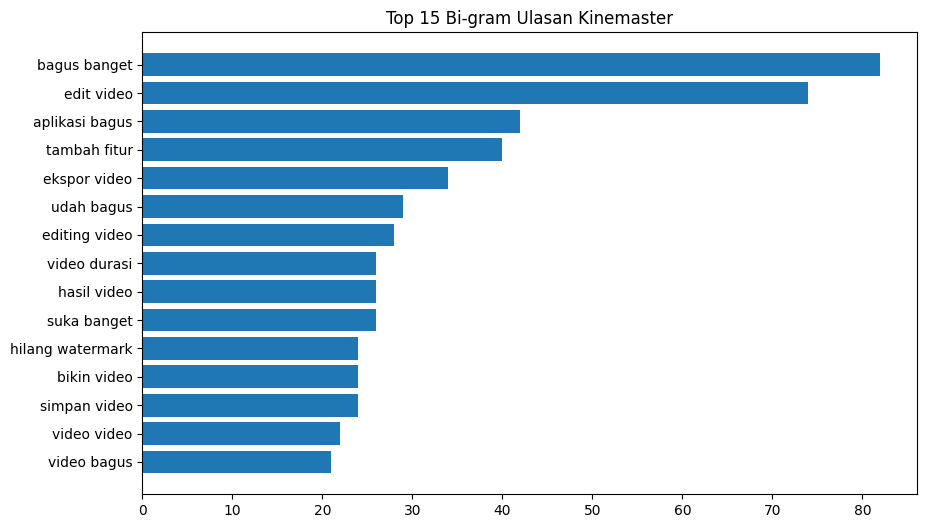

In [ ]:
# Bi-gram
tokens_all = []
for text in df2['clean_comment']:
    tokens_all.extend(text.split())
bi_grams = list(bigrams(tokens_all))
bi_count = Counter(bi_grams).most_common(15)

# Tampilkan bar chart bigram
plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2}" for (w1,w2),_ in bi_count], [c for _,c in bi_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Bi-gram Ulasan Kinemaster")
plt.show()

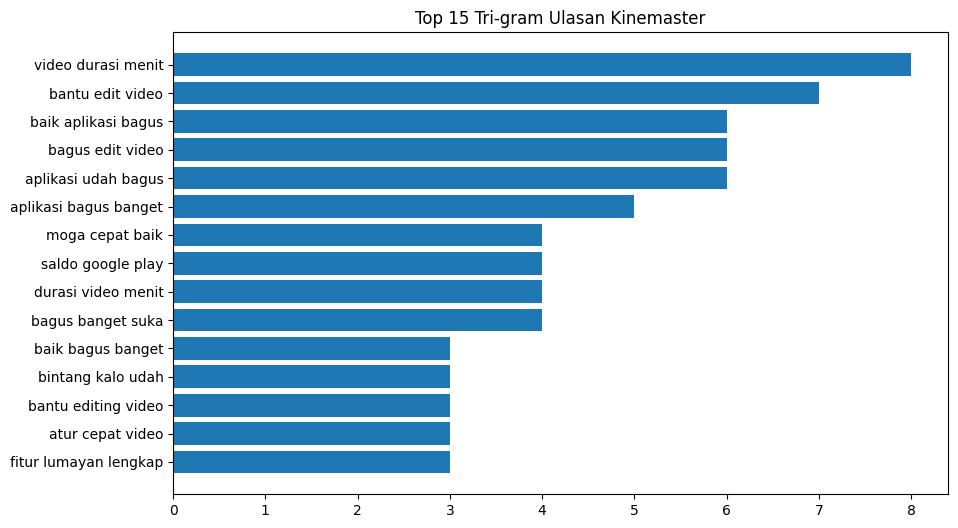

In [ ]:
# Tri-gram
tri_grams = list(trigrams(tokens_all))
tri_count = Counter(tri_grams).most_common(15)

plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2} {w3}" for (w1,w2,w3),_ in tri_count], [c for _,c in tri_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Tri-gram Ulasan Kinemaster")
plt.show()

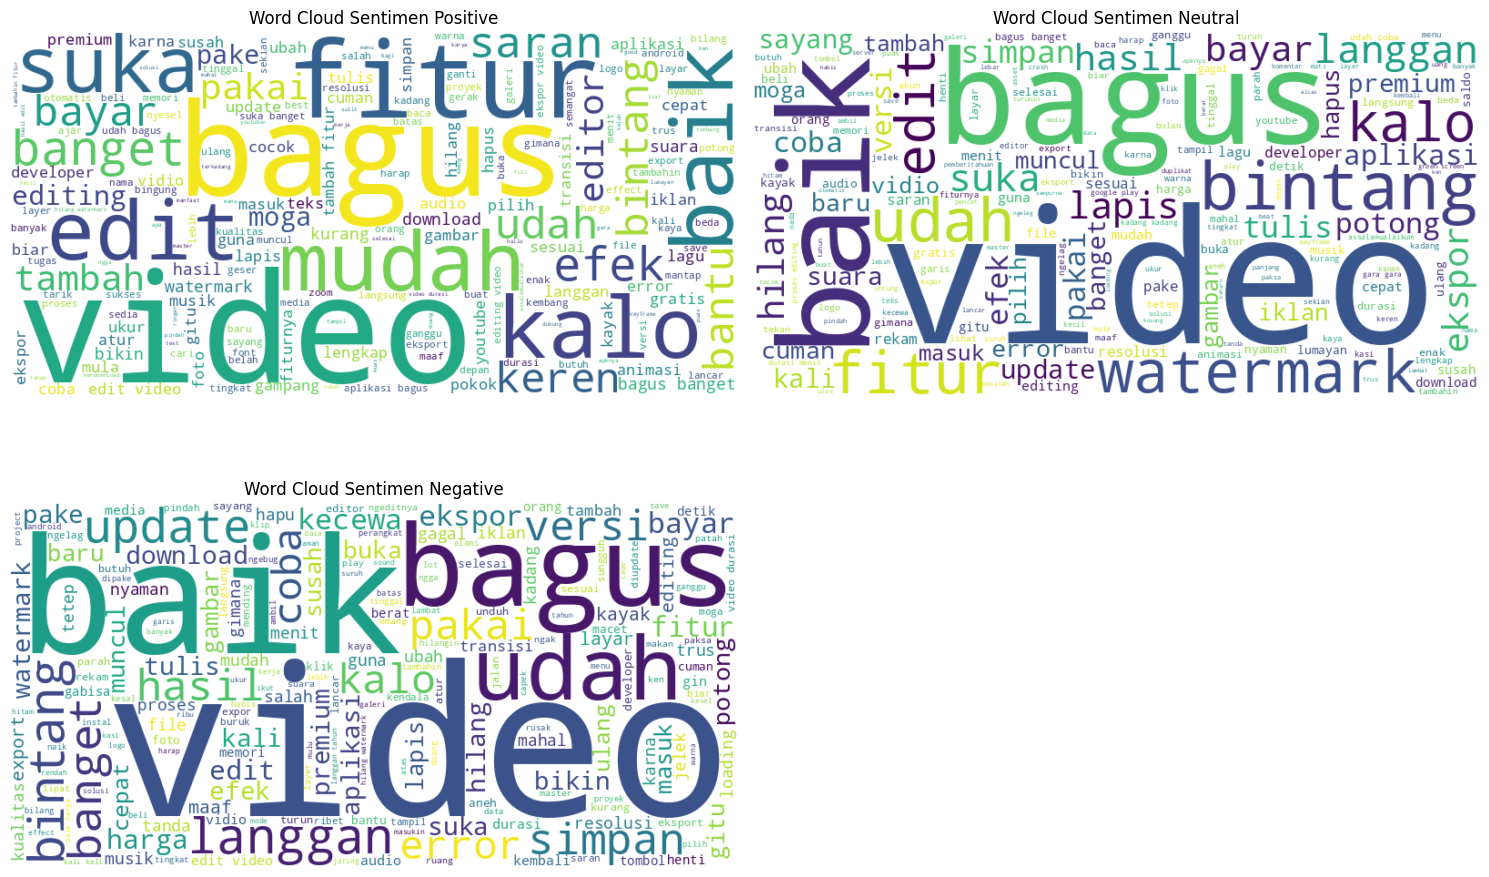

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    # Gabungkan token berdasarkan sentimen
    text = ' '.join(df2[df2['sentiment_rating'] == sent]['clean_comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud Sentimen {sent}")

    # Simpan file
    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## 3. INSHOT

In [ ]:
result, continuation_token = reviews(
    'com.camerasideas.instashot',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1250,
    filter_score_with=None
)
data3 = pd.DataFrame(np.array(result), columns=['review'])
data3 = data3.join(pd.DataFrame(data3.pop('review').tolist()))
data3.head()

reviewId        userName  \
0  02cd7f93-ef97-469c-85d4-120835090374       Hikma Nur   
1  d0376484-265d-47d4-945a-8aa847e9253b  Rega Nurhaliza   
2  dd481bde-6c96-49d0-9819-4d7df8004972     Maula Aulia   
3  52dd2c71-1d90-4421-8e4a-8a3f78929a00       Billy Lim   
4  27cfb96b-1b81-4b70-bd17-d0484ece81c1    Cocok Sekali   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  suka banget ngga bikin hp jadi lalot, cocok ba...      5            148   
1  srius apk nya bagus banget dan bisa di gunakan...      5            181   
2  Fiturnya lengkap dan gratis meskipun kalau mau...      5             78   
3  semuanya bagus, tapi masalahnya aplikasinya su...      5             10   
4  Waw...tambah mantul aja nih tool. Moga konsist...      5              6   

  reviewCreatedVersion                  at  \
0           2.162.1510 2025-10-27 03:49:11   
1           2.175.1517 2025-11-22 08:02:49   
2           2.163.1511 2025-11-16 06:28:04   
3           2.175.1517 2025-12-23 05:26:47   
4           2.175.1517 2025-12-21 05:59:01   

                                        replyContent           repliedAt  \
0                                               None                 NaT   
1  Pengguna yang Terhormat, Kami selalu berupaya ... 2025-11-24 03:03:00   
2                                               None                 NaT   
3                                               None                 NaT   
4                                               None                 NaT   

   appVersion  
0  2.162.1510  
1  2.175.1517  
2  2.163.1511  
3  2.175.1517  
4  2.175.1517

In [ ]:
data3_baru = data3[['userName', 'content', 'score']]
data3 = data3_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data3.head()

Nama Akun                                             ulasan  rating
0       Hikma Nur  suka banget ngga bikin hp jadi lalot, cocok ba...       5
1  Rega Nurhaliza  srius apk nya bagus banget dan bisa di gunakan...       5
2     Maula Aulia  Fiturnya lengkap dan gratis meskipun kalau mau...       5
3       Billy Lim  semuanya bagus, tapi masalahnya aplikasinya su...       5
4    Cocok Sekali  Waw...tambah mantul aja nih tool. Moga konsist...       5

### preprocessing data

In [ ]:
df3 = pd.DataFrame(data3)

In [ ]:
df3["clean_comment"] = df3["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df3.head()

Nama Akun                                             ulasan  rating  \
0       Hikma Nur  suka banget ngga bikin hp jadi lalot, cocok ba...       5   
1  Rega Nurhaliza  srius apk nya bagus banget dan bisa di gunakan...       5   
2     Maula Aulia  Fiturnya lengkap dan gratis meskipun kalau mau...       5   
3       Billy Lim  semuanya bagus, tapi masalahnya aplikasinya su...       5   
4    Cocok Sekali  Waw...tambah mantul aja nih tool. Moga konsist...       5   

                                       clean_comment  
0  suka banget ngga bikin lalot cocok banget tuga...  
1  srius bagus banget offline efek udah diunload ...  
2  fiturnya lengkap gratis lengkap premium fitur ...  
3  bagus aplikasi editing video notifikasi mogok ...  
4  wawtambah mantul tool moga konsisten dengar bi...

In [ ]:
#cek data kosong
df3.isnull().sum()

Nama Akun        0
ulasan           0
rating           0
clean_comment    0
dtype: int64

In [ ]:
#cek data yang sama
df3.duplicated().any()

np.False_

In [ ]:
df3['sentiment_rating'] = df3['rating'].apply(sentiment_from_rating)

In [ ]:
df3['sentiment_lexicon'] = df3['clean_comment'].apply(sentiment_lexicon)

In [ ]:
rating_counts = df3['sentiment_rating'].value_counts()
lexicon_counts = df3['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

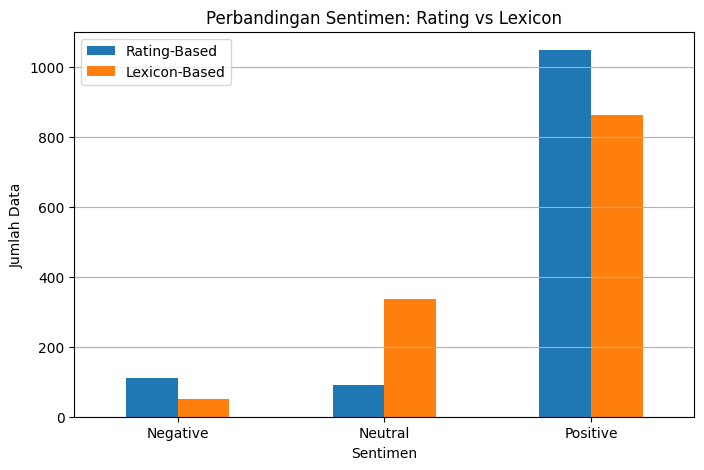

In [ ]:
comparison_df.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title('Perbandingan Sentimen: Rating vs Lexicon')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
df3.head()

Nama Akun                                             ulasan  rating  \
0       Hikma Nur  suka banget ngga bikin hp jadi lalot, cocok ba...       5   
1  Rega Nurhaliza  srius apk nya bagus banget dan bisa di gunakan...       5   
2     Maula Aulia  Fiturnya lengkap dan gratis meskipun kalau mau...       5   
3       Billy Lim  semuanya bagus, tapi masalahnya aplikasinya su...       5   
4    Cocok Sekali  Waw...tambah mantul aja nih tool. Moga konsist...       5   

                                       clean_comment sentiment_rating  \
0  suka banget ngga bikin lalot cocok banget tuga...         Positive   
1  srius bagus banget offline efek udah diunload ...         Positive   
2  fiturnya lengkap gratis lengkap premium fitur ...         Positive   
3  bagus aplikasi editing video notifikasi mogok ...         Positive   
4  wawtambah mantul tool moga konsisten dengar bi...         Positive   

  sentiment_lexicon  
0          Positive  
1          Positive  
2          Positive  
3           Neutral  
4           Neutral

In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_inshotr.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter

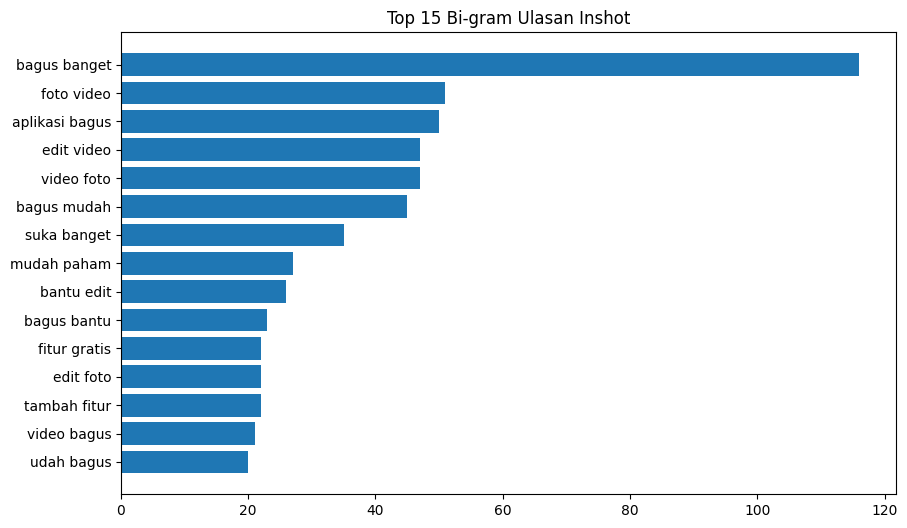

In [ ]:
# Bi-gram
tokens_all = []
for text in df3['clean_comment']:
    tokens_all.extend(text.split())
bi_grams = list(bigrams(tokens_all))
bi_count = Counter(bi_grams).most_common(15)

# Tampilkan bar chart bigram
plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2}" for (w1,w2),_ in bi_count], [c for _,c in bi_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Bi-gram Ulasan Inshot")
plt.show()

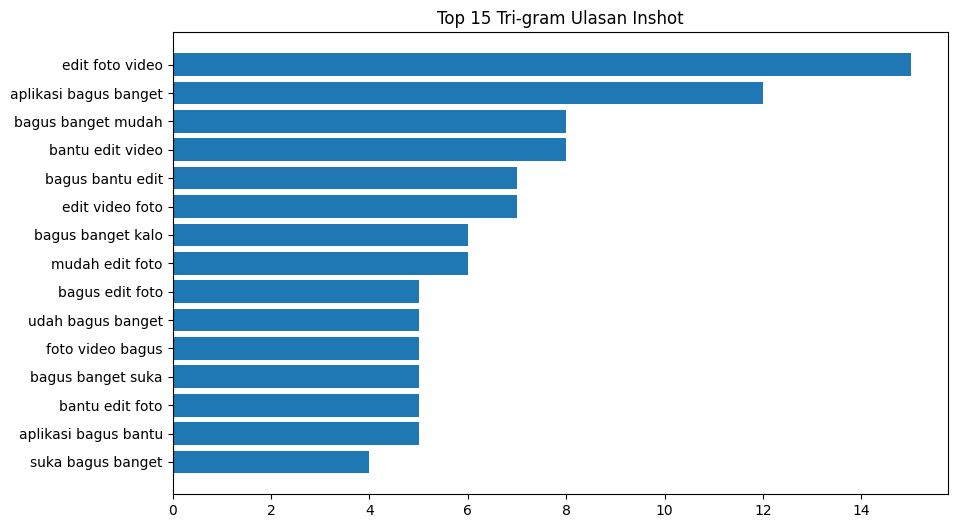

In [ ]:
# Tri-gram
tri_grams = list(trigrams(tokens_all))
tri_count = Counter(tri_grams).most_common(15)

plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2} {w3}" for (w1,w2,w3),_ in tri_count], [c for _,c in tri_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Tri-gram Ulasan Inshot")
plt.show()

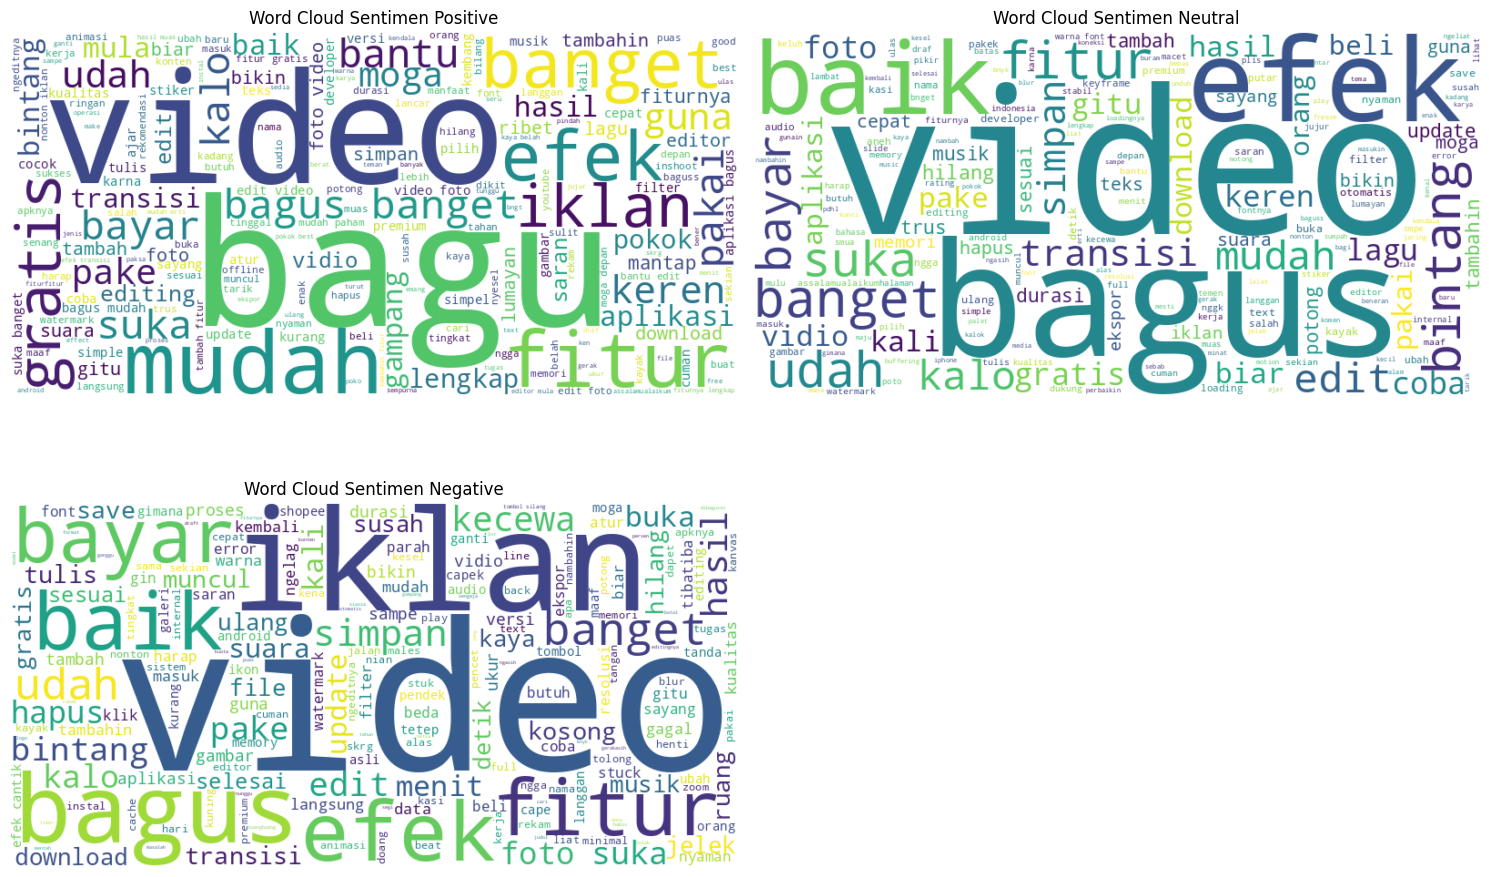

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    # Gabungkan token berdasarkan sentimen
    text = ' '.join(df3[df3['sentiment_rating'] == sent]['clean_comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud Sentimen {sent}")

    # Simpan file
    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## 4. VN

In [ ]:
result, continuation_token = reviews(
    'com.frontrow.vlog',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1250,
    filter_score_with=None
)
data4 = pd.DataFrame(np.array(result), columns=['review'])
data4 = data4.join(pd.DataFrame(data4.pop('review').tolist()))
data4.head()

reviewId       userName  \
0  a407011f-5e40-47d7-a668-6fa77cefa80a        El Rose   
1  2f72101f-d4ce-4a50-a3e9-23f40ab88103  Idik Mc Ultah   
2  746ed460-c6be-4bd7-9d27-cd031bdfe1e6     Bagus Lite   
3  3d682857-3afa-4712-8a99-47e0d6b122ae   ZulQuki Play   
4  7adb1571-80e1-4521-99fb-2f3588d46790        FarCode   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Sebelum di update pada fitur tambahkan sticker...      5            114   
1  No. Tidak saya rekomendasikan, karna ngedit ca...      1              1   
2  Untuk penggunaan fx pada video masih suka bug....      3              0   
3  Cukup lengkap untuk pemula seperti saya, denga...      5             21   
4  Alhamdulillah,Developernya baik banget ngasih ...      5              6   

  reviewCreatedVersion                  at replyContent repliedAt appVersion  
0                2.9.9 2025-12-21 13:23:59         None       NaT      2.9.9  
1                2.9.7 2025-12-14 17:22:06         None       NaT      2.9.7  
2                2.9.6 2025-12-09 03:04:30         None       NaT      2.9.6  
3                2.9.6 2025-11-26 18:10:23         None       NaT      2.9.6  
4                2.9.8 2025-12-19 18:48:19         None       NaT      2.9.8

In [ ]:
data4_baru = data4[['userName', 'content', 'score']]
data4 = data4_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data4.head()

Nama Akun                                             ulasan  rating
0        El Rose  Sebelum di update pada fitur tambahkan sticker...       5
1  Idik Mc Ultah  No. Tidak saya rekomendasikan, karna ngedit ca...       1
2     Bagus Lite  Untuk penggunaan fx pada video masih suka bug....       3
3   ZulQuki Play  Cukup lengkap untuk pemula seperti saya, denga...       5
4        FarCode  Alhamdulillah,Developernya baik banget ngasih ...       5

### preprocessing data

In [ ]:
df4 = pd.DataFrame(data4)

In [ ]:
df4["clean_comment"] = df4["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df4.head()

Nama Akun                                             ulasan  rating  \
0        El Rose  Sebelum di update pada fitur tambahkan sticker...       5   
1  Idik Mc Ultah  No. Tidak saya rekomendasikan, karna ngedit ca...       1   
2     Bagus Lite  Untuk penggunaan fx pada video masih suka bug....       3   
3   ZulQuki Play  Cukup lengkap untuk pemula seperti saya, denga...       5   
4        FarCode  Alhamdulillah,Developernya baik banget ngasih ...       5   

                                       clean_comment  
0  update fitur tambah sticker pilih elemen giphy...  
1  rekomendasi karna capekcapek tibatiba hilang s...  
2  guna video suka mana pilih clip pilih klik bai...  
3  lengkap mula fitur mudah sesuai watermark ubiq...  
4  alhamdulillahdevelopernya banget ngasih gratis...

In [ ]:
#cek data kosong
df4.isnull().sum()

Nama Akun        0
ulasan           0
rating           0
clean_comment    0
dtype: int64

In [ ]:
#cek data yang sama
df4.duplicated().any()

np.False_

In [ ]:
df4['sentiment_rating'] = df4['rating'].apply(sentiment_from_rating)

In [ ]:
df4['sentiment_lexicon'] = df4['clean_comment'].apply(sentiment_lexicon)

In [ ]:
rating_counts = df4['sentiment_rating'].value_counts()
lexicon_counts = df4['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

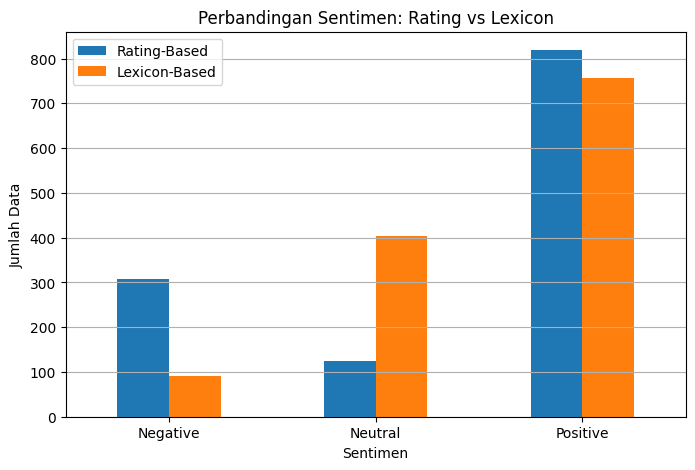

In [ ]:
comparison_df.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title('Perbandingan Sentimen: Rating vs Lexicon')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
df4.head()

Nama Akun                                             ulasan  rating  \
0        El Rose  Sebelum di update pada fitur tambahkan sticker...       5   
1  Idik Mc Ultah  No. Tidak saya rekomendasikan, karna ngedit ca...       1   
2     Bagus Lite  Untuk penggunaan fx pada video masih suka bug....       3   
3   ZulQuki Play  Cukup lengkap untuk pemula seperti saya, denga...       5   
4        FarCode  Alhamdulillah,Developernya baik banget ngasih ...       5   

                                       clean_comment sentiment_rating  \
0  update fitur tambah sticker pilih elemen giphy...         Positive   
1  rekomendasi karna capekcapek tibatiba hilang s...         Negative   
2  guna video suka mana pilih clip pilih klik bai...          Neutral   
3  lengkap mula fitur mudah sesuai watermark ubiq...         Positive   
4  alhamdulillahdevelopernya banget ngasih gratis...         Positive   

  sentiment_lexicon  
0           Neutral  
1           Neutral  
2          Positive  
3          Positive  
4           Neutral

In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_vn.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter

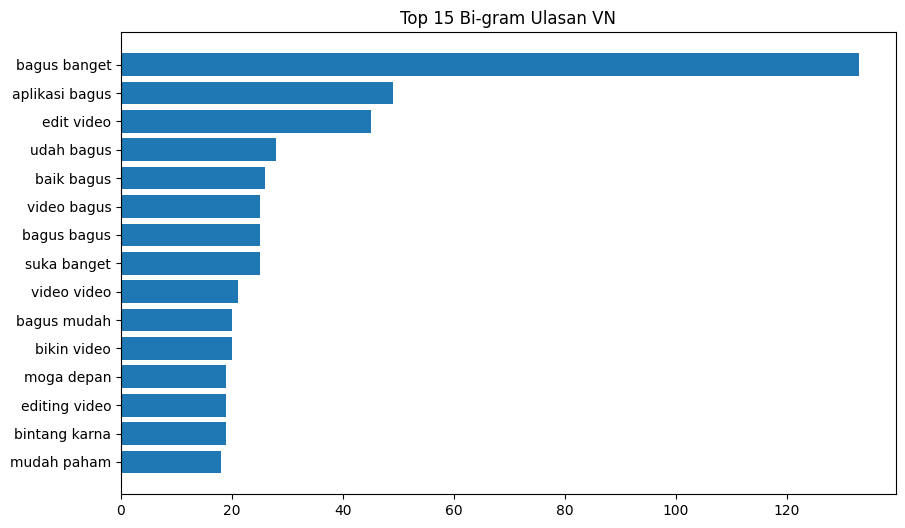

In [ ]:
# Bi-gram
tokens_all = []
for text in df4['clean_comment']:
    tokens_all.extend(text.split())
bi_grams = list(bigrams(tokens_all))
bi_count = Counter(bi_grams).most_common(15)

# Tampilkan bar chart bigram
plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2}" for (w1,w2),_ in bi_count], [c for _,c in bi_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Bi-gram Ulasan VN")
plt.show()

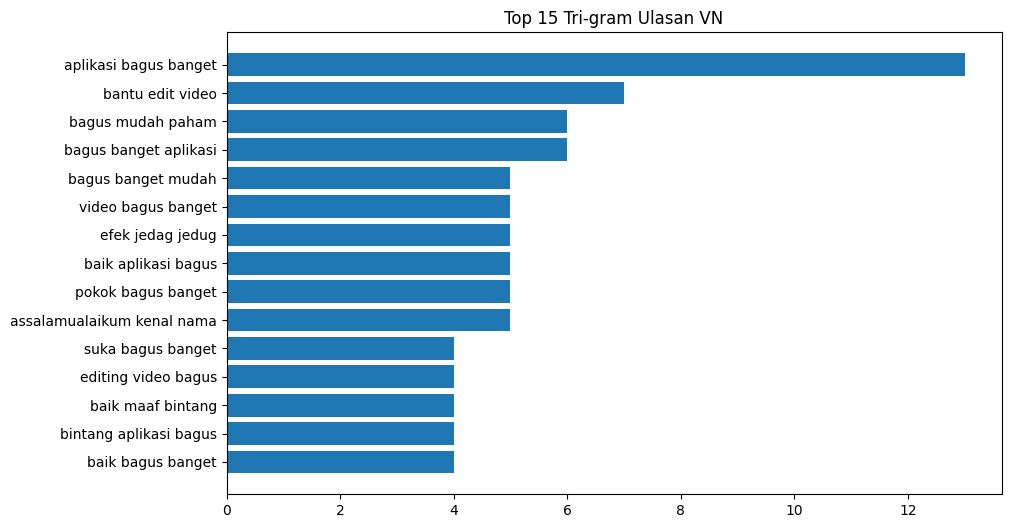

In [ ]:
# Tri-gram
tri_grams = list(trigrams(tokens_all))
tri_count = Counter(tri_grams).most_common(15)

plt.figure(figsize=(10,6))
plt.barh([f"{w1} {w2} {w3}" for (w1,w2,w3),_ in tri_count], [c for _,c in tri_count])
plt.gca().invert_yaxis()
plt.title("Top 15 Tri-gram Ulasan VN")
plt.show()

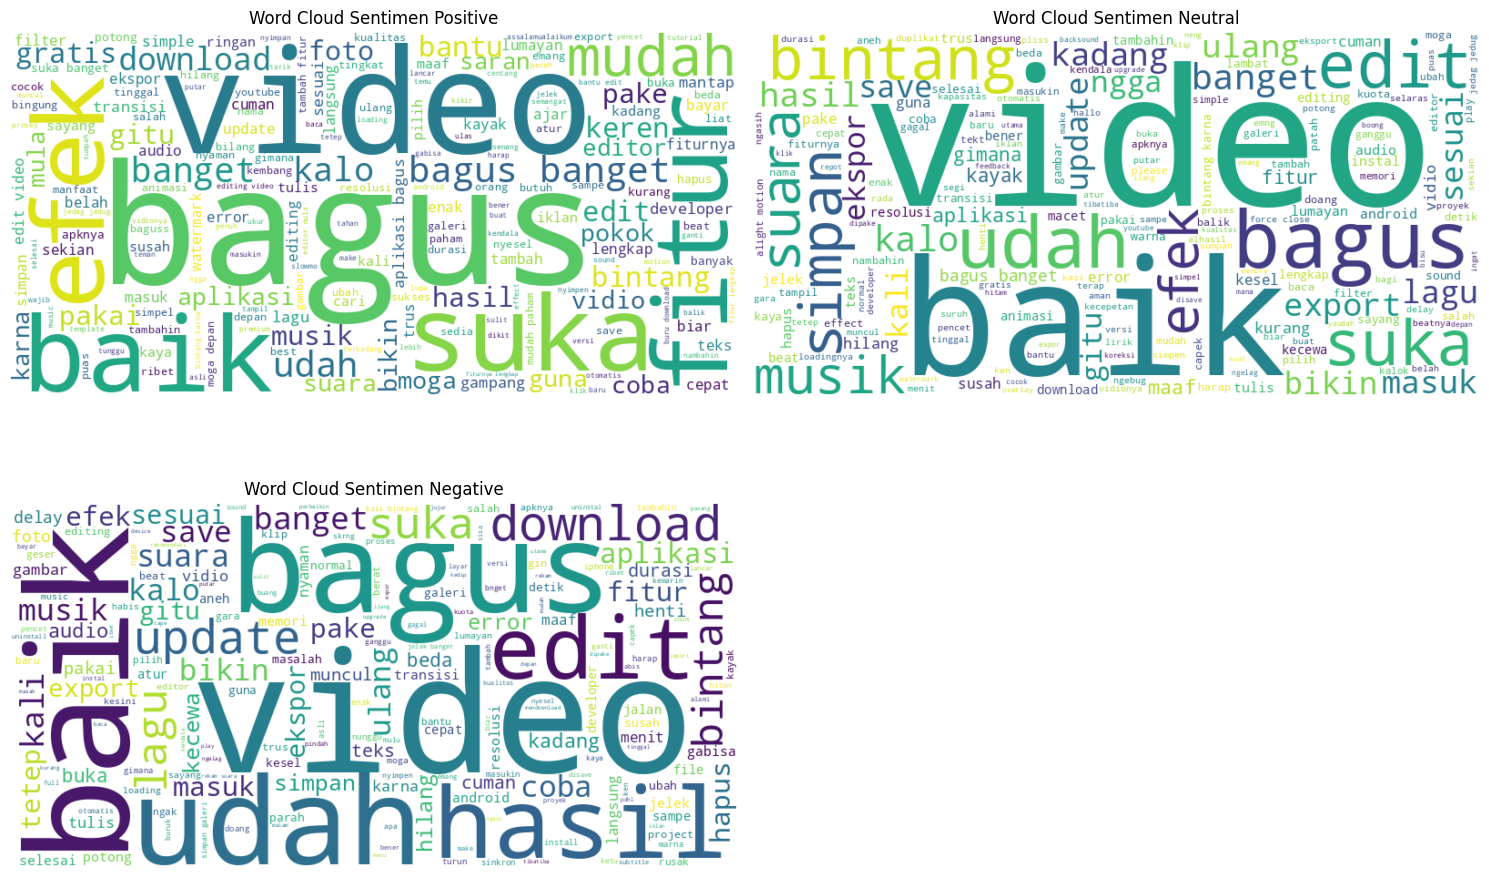

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    # Gabungkan token berdasarkan sentimen
    text = ' '.join(df4[df4['sentiment_rating'] == sent]['clean_comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud Sentimen {sent}")

    # Simpan file
    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()